<a href="https://colab.research.google.com/github/Nidhi-S-Vas/Assignment-case_studies/blob/main/CaseStudy01__Preprocessingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Dataset

In [633]:
import pandas as pd

In [634]:
Data=pd.read_csv('/content/train_loan.csv')

In [635]:
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Preprocessing

## Missing value handling

In [636]:
Data.info() # To get the information of the DataFrame i

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [637]:
Data.describe() # To get the mean,median,count,std etc
# By checking the mean and median we can see the skewness is very high

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### To check duplicated vaues

In [638]:
Data.duplicated().sum()

np.int64(0)

### Check the null values

In [639]:
Data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


#### get the percentage of null values

In [640]:
round(Data.isnull().mean()*100,3)

,0
Loan_ID,0.000
Gender,2.117
Married,0.489
Dependents,2.443
Education,0.000
Self_Employed,5.212
ApplicantIncome,0.000
CoapplicantIncome,0.000
LoanAmount,3.583
Loan_Amount_Term,2.280


## there are few missing values ,the percentage is lessthan 50% so replacing it

### to replace we take mean or median for numerical column and mode for categorical column

In [641]:
Data.select_dtypes(include='number').median()

,0
ApplicantIncome,3812.5
CoapplicantIncome,1188.5
LoanAmount,128.0
Loan_Amount_Term,360.0
Credit_History,1.0


In [642]:
Data.select_dtypes(include='number').mean()

,0
ApplicantIncome,5403.459283
CoapplicantIncome,1621.245798
LoanAmount,146.412162
Loan_Amount_Term,342.000000
Credit_History,0.842199


##the median is taken for replacement in Numerical columns and mode for object or categorical column

In [643]:
# simple imputer to fill the missing values


from sklearn.impute import SimpleImputer

for col in Data.columns:
  if Data[col].dtype in ['float64', 'int64']:
    imputer = SimpleImputer(strategy='median')
  else:
    imputer = SimpleImputer(strategy='most_frequent')

  Data[[col]] = imputer.fit_transform(Data[[col]])

print('Dataset after replacing missing values:')
Data.head(5)


Dataset after replacing missing values:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [644]:
Data.isnull().mean()*100

,0
Loan_ID,0.0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0


Null values removed

## Checking outliers

In [645]:
Data.select_dtypes(include='number').skew() # checking skewness

,0
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.743053
Loan_Amount_Term,-2.402112
Credit_History,-2.021971


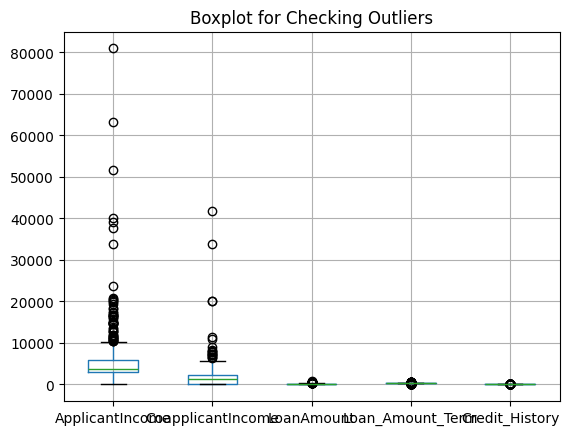

In [646]:
import matplotlib.pyplot as plt
Data.boxplot()
plt.title('Boxplot for Checking Outliers')
plt.show()

Boxplot shows the presence of Outliers in the dataset

In [647]:
# Selecting the numerical columns

Data_num=Data.select_dtypes(include='number').columns
Data_num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [648]:
#Outlier handling using IQR

import pandas as pd
def remove_outliers(Data,Data_num):

    for i in Data_num:
        q1=Data[i].quantile(0.25)
        q3=Data[i].quantile(0.75)
        iqr=q3-q1

        minimum=q1-1.5*iqr
        maximum=q3+1.5*iqr
        Data=Data[(Data[i]>=minimum) & (Data[i]<=maximum)]
    return Data

In [649]:
Data=remove_outliers(Data,Data_num)

In [650]:
Data.select_dtypes(include='number').skew()

,0
ApplicantIncome,1.158806
CoapplicantIncome,0.787159
LoanAmount,0.119414
Loan_Amount_Term,0.000000
Credit_History,0.000000


Outliers are handled to an extend but still a small amount of outliers

##Encoding

In [651]:
#removing the Loan_ID because less relevant for prediction
Data.drop('Loan_ID',axis=1,inplace=True)

In [652]:
# selecting the categorical data
Categorical=Data.select_dtypes("object").columns
Categorical

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [653]:
#to get the count of values in each column
for i in Categorical:
  print(Data[i].value_counts())

Gender
Male      309
Female     74
Name: count, dtype: int64
Married
Yes    245
No     138
Name: count, dtype: int64
Dependents
0     239
2      62
1      59
3+     23
Name: count, dtype: int64
Education
Graduate        297
Not Graduate     86
Name: count, dtype: int64
Self_Employed
No     339
Yes     44
Name: count, dtype: int64
Property_Area
Semiurban    149
Rural        121
Urban        113
Name: count, dtype: int64
Loan_Status
Y    313
N     70
Name: count, dtype: int64


Encoding the data, going with label encoding for binary column and with one hot encoding for the rest

In [654]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             383 non-null    object 
 1   Married            383 non-null    object 
 2   Dependents         383 non-null    object 
 3   Education          383 non-null    object 
 4   Self_Employed      383 non-null    object 
 5   ApplicantIncome    383 non-null    float64
 6   CoapplicantIncome  383 non-null    float64
 7   LoanAmount         383 non-null    float64
 8   Loan_Amount_Term   383 non-null    float64
 9   Credit_History     383 non-null    float64
 10  Property_Area      383 non-null    object 
 11  Loan_Status        383 non-null    object 
dtypes: float64(5), object(7)
memory usage: 38.9+ KB


In [655]:
from sklearn.preprocessing import LabelEncoder



le = LabelEncoder()

#  Label Encoding (binary columns or order doesn't matter much)
Data['Gender'] = le.fit_transform(Data['Gender'])
Data['Married'] = le.fit_transform(Data['Married'])
Data['Education'] = le.fit_transform(Data['Education'])
Data['Self_Employed'] = le.fit_transform(Data['Self_Employed'])
Data['Loan_Status'] = le.fit_transform(Data['Loan_Status'])

# One-Hot Encoding (multi-category columns)
Data = pd.get_dummies(Data, columns=['Dependents','Property_Area'], drop_first=True)

Data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849.0,0.0,128.0,360.0,1.0,1,False,False,False,False,True
1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,True,False,False,False,False
2,1,1,0,1,3000.0,0.0,66.0,360.0,1.0,1,False,False,False,False,True
3,1,1,1,0,2583.0,2358.0,120.0,360.0,1.0,1,False,False,False,False,True
4,1,0,0,0,6000.0,0.0,141.0,360.0,1.0,1,False,False,False,False,True


##Scaling

In [656]:
# feature engineering selecting the features and the target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = Data.drop("Loan_Status", axis=1) #feature selection
y = Data["Loan_Status"]  # target selection


print(X.shape)
print(y.shape)

(383, 14)
(383,)


In [657]:
#Scaling the features ,target are not scaled


scaler = StandardScaler()
X = scaler.fit_transform(X)


In [658]:
X

array([[ 0.48936919, -1.33242723, -0.53810992, ..., -0.25276251,
        -0.7979675 ,  1.54576212],
       [ 0.48936919,  0.75051003, -0.53810992, ..., -0.25276251,
        -0.7979675 , -0.64693007],
       [ 0.48936919,  0.75051003, -0.53810992, ..., -0.25276251,
        -0.7979675 ,  1.54576212],
       ...,
       [ 0.48936919,  0.75051003, -0.53810992, ..., -0.25276251,
        -0.7979675 , -0.64693007],
       [-2.04344701, -1.33242723, -0.53810992, ..., -0.25276251,
        -0.7979675 , -0.64693007],
       [ 0.48936919,  0.75051003, -0.53810992, ..., -0.25276251,
        -0.7979675 ,  1.54576212]])

In [659]:
# splitting the data to test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(306, 14)
(77, 14)
(306,)
(77,)
